In [1]:
# Import the libraries

# essential libraries
import math
import random
from datetime import timedelta

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
import folium

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
#setting up the directory
import os
os.chdir("/home/sarvammittal/projects/covid-19_analysis")

In [5]:
COVID19_line_list_data = pd.read_csv('./data/raw/Apr_13_2020/COVID19_line_list_data.csv')
COVID19_line_list_data.head(2)

id  case_in_country reporting date  Unnamed: 3  \
0   1              NaN      1/20/2020         NaN   
1   2              NaN      1/20/2020         NaN   

                                             summary             location  \
0  First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1  First confirmed imported COVID-19 pneumonia pa...             Shanghai   

  country  gender   age symptom_onset  ...  recovered symptom  \
0   China    male  66.0      01/03/20  ...          0     NaN   
1   China  female  56.0     1/15/2020  ...          0     NaN   

                                              source  \
0               Shenzhen Municipal Health Commission   
1  Official Weibo of Shanghai Municipal Health Co...   

                                                link  Unnamed: 21  \
0  http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...          NaN   
1  https://www.weibo.com/2372649470/IqogQhgfa?fro...          NaN   

   Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  

[2 rows x 27 columns]

In [6]:
#Cleaning the COVID19_line_list dataset
COVID19_line_list_data = COVID19_line_list_data[COVID19_line_list_data.columns[:-8]]
COVID19_line_list_data.drop('Unnamed: 3', axis=1, inplace=True)

In [7]:
COVID19_line_list_data.head(2)

id  case_in_country reporting date  \
0   1              NaN      1/20/2020   
1   2              NaN      1/20/2020   

                                             summary             location  \
0  First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1  First confirmed imported COVID-19 pneumonia pa...             Shanghai   

  country  gender   age symptom_onset  If_onset_approximated hosp_visit_date  \
0   China    male  66.0      01/03/20                    0.0        01/11/20   
1   China  female  56.0     1/15/2020                    0.0       1/15/2020   

  exposure_start exposure_end  visiting Wuhan  from Wuhan death recovered  \
0     12/29/2019     01/04/20               1         0.0     0         0   
1            NaN     01/12/20               0         1.0     0         0   

  symptom  
0     NaN  
1     NaN

In [9]:
# using timestamp to work with date
COVID19_line_list_data['reporting date'] = pd.to_datetime(COVID19_line_list_data['reporting date'])
COVID19_line_list_data['exposure_start'] = pd.to_datetime(COVID19_line_list_data['exposure_start'])
COVID19_line_list_data['exposure_end'] = pd.to_datetime(COVID19_line_list_data['exposure_end'])
COVID19_line_list_data['hosp_visit_date'] = pd.to_datetime(COVID19_line_list_data['hosp_visit_date'])
COVID19_line_list_data['symptom_onset'] = pd.to_datetime(COVID19_line_list_data['symptom_onset'])

In [11]:
#importing the other dataset
COVID19_open_line_list= pd.read_csv('./data/raw/Apr_13_2020/COVID19_open_line_list.csv')
COVID19_open_line_list.head(2)

ID age   sex                        city province country  \
0  1.0  30  male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47  male  Baohe District, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)  latitude  longitude geo_resolution  ... Unnamed: 35  \
0                    1.0  31.64696   117.7166         admin3  ...         NaN   
1                    1.0  31.77863   117.3319         admin3  ...         NaN   

  Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 42 Unnamed: 43  Unnamed: 44  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  

[2 rows x 45 columns]

In [12]:
# dividing int male and female
COVID19_open_line_list= COVID19_open_line_list[COVID19_open_line_list.columns[:-12]]
COVID19_open_line_list.loc[COVID19_open_line_list['sex']=='male', 'sex'] = 'Male'
COVID19_open_line_list.loc[COVID19_open_line_list['sex']=='female', 'sex'] = 'Female'
COVID19_open_line_list.head(2)

ID age   sex                        city province country  \
0  1.0  30  Male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47  Male  Baohe District, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)  latitude  longitude geo_resolution  ... outcome  \
0                    1.0  31.64696   117.7166         admin3  ...     NaN   
1                    1.0  31.77863   117.3319         admin3  ...     NaN   

  date_death_or_discharge notes_for_discussion location          admin3  \
0                     NaN                  NaN      NaN     Chaohu City   
1                     NaN                  NaN      NaN  Baohe District   

       admin2 admin1 country_new admin_id  data_moderator_initials  
0  Hefei City  Anhui       China   340181                      NaN  
1  Hefei City  Anhui       China   340111                      NaN  

[2 rows x 33 columns]

In [8]:
#importing the third dataset
full_table= pd.read_csv('./data/raw/Apr_13_2020/covid_19_clean_complete.csv',parse_dates=['Date'])
full_table.head(2)

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0

In [13]:
# dataframe info
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21484 entries, 0 to 21483
Data columns (total 8 columns):
Province/State    6560 non-null object
Country/Region    21484 non-null object
Lat               21484 non-null float64
Long              21484 non-null float64
Date              21484 non-null datetime64[ns]
Confirmed         21484 non-null int64
Deaths            21484 non-null int64
Recovered         21484 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [14]:
# checking for missing value
full_table.isna().sum()

Province/State    14924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

#### Preprocessing

In [15]:
# ship rows
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

# ship
ship = full_table[ship_rows]

# full table 
full_table = full_table[~(ship_rows)]

# Latest cases from the ships
ship_latest = ship[ship['Date']==max(ship['Date'])]

In [16]:
# Cleaning data

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']] = full_table[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# fixing datatypes
full_table['Recovered'] = full_table['Recovered'].astype(int)

full_table.head(6)

Province/State       Country/Region      Lat     Long       Date  Confirmed  \
0                         Afghanistan  33.0000  65.0000 2020-01-22          0   
1                             Albania  41.1533  20.1683 2020-01-22          0   
2                             Algeria  28.0339   1.6596 2020-01-22          0   
3                             Andorra  42.5063   1.5218 2020-01-22          0   
4                              Angola -11.2027  17.8739 2020-01-22          0   
5                 Antigua and Barbuda  17.0608 -61.7964 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       0  
1       0          0       0  
2       0          0       0  
3       0          0       0  
4       0          0       0  
5       0          0       0

In [17]:
# Grouped by day, country
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# new cases
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)
full_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22    Afghanistan          0       0          0       0          0   
1 2020-01-22        Albania          0       0          0       0          0   
2 2020-01-22        Algeria          0       0          0       0          0   
3 2020-01-22        Andorra          0       0          0       0          0   
4 2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [18]:
# Day wise grouping

# table
day_wise = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases'].sum().reset_index()

# number cases per 100 cases
day_wise['Deaths / 100 Cases'] = round((day_wise['Deaths']/day_wise['Confirmed'])*100, 2)
day_wise['Recovered / 100 Cases'] = round((day_wise['Recovered']/day_wise['Confirmed'])*100, 2)
day_wise['Deaths / 100 Recovered'] = round((day_wise['Deaths']/day_wise['Recovered'])*100, 2)

# no. of countries
day_wise['No. of countries'] = full_grouped[full_grouped['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len).values

# fillna by 0
cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
day_wise[cols] = day_wise[cols].fillna(0)

day_wise.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  \
0 2020-01-22        555      17         28     510          0   
1 2020-01-23        654      18         30     606         99   
2 2020-01-24        941      26         36     879        287   
3 2020-01-25       1434      42         39    1353        493   
4 2020-01-26       2118      56         52    2010        684   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.06                   5.05                   60.71   
1                2.75                   4.59                   60.00   
2                2.76                   3.83                   72.22   
3                2.93                   2.72                  107.69   
4                2.64                   2.46                  107.69   

   No. of countries  
0                 6  
1                 8  
2                 9  
3                11  
4                13

In [19]:
# Country wise grouping

# getting latest values
country_wise = full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date', axis=1)

# group by country
country_wise = country_wise.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases'].sum().reset_index()

# per 100 cases
country_wise['Deaths / 100 Cases'] = round((country_wise['Deaths']/country_wise['Confirmed'])*100, 2)
country_wise['Recovered / 100 Cases'] = round((country_wise['Recovered']/country_wise['Confirmed'])*100, 2)
country_wise['Deaths / 100 Recovered'] = round((country_wise['Deaths']/country_wise['Recovered'])*100, 2)

cols = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
country_wise[cols] = country_wise[cols].fillna(0)

country_wise.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0    Afghanistan        607      18         32     557         52   
1        Albania        446      23        217     206         13   
2        Algeria       1914     293        591    1030         89   
3        Andorra        638      29        128     481         37   
4         Angola         19       2          4      13          0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  
0                2.97                   5.27                   56.25  
1                5.16                  48.65                   10.60  
2               15.31                  30.88                   49.58  
3                4.55                  20.06                   22.66  
4               10.53                  21.05                   50.00

#### Countries in the world by population (2020)
So we need to scrap the data from worldometer website and then use it

In [ ]:
'''
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.worldometers.info/world-population/population-by-country/"
r = requests.get(url)

soup = BeautifulSoup(r.content)

countries = soup.find_all('table')[0]
df=pd.read_html(str(countries))[0]

def function(a,b,c,d,e,f,g,h,i,j,k):
    data = pd.DataFrame(
    { 'a':df[a],
      'b':df[b],
      'c':df[c],
      'd':df[d],
      'e':df[e],
      'f':df[f],
      'g':df[g],
      'h':df[h],
      'i':df[i],
      'j':df[j],
      'k':df[k]})
    return data

df = function('Country (or dependency)','Population (2020)','Yearly Change','Net Change','Density (P/Km²)',
              'Land Area (Km²)','Migrants (net)','Fert. Rate','Med. Age','Urban Pop %','World Share')

df.columns =['Country (or dependency)','Population (2020)','Yearly Change','Net Change','Density (P/Km²)',
              'Land Area (Km²)','Migrants (net)','Fert. Rate','Med. Age','Urban Pop %','World Share']

export_csv = df.to_csv(r'/home/sarvammittal/projects/covid-19_analysis/data/raw/pop.csv',index=None,header=True)
'''

In [21]:
# load population dataset which we scraped from worldometer
pop = pd.read_csv("./data/raw/Apr_13_2020/population_by_country_2020.csv")

# select only population
pop = pop.iloc[:, :2]

# rename column names
pop.columns = ['Country/Region', 'Population']

# merged data
country_wise = pd.merge(country_wise, pop, on='Country/Region', how='left')

# update population
cols = ['Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Czechia', 
        'Kosovo', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 
        'Taiwan*', 'US', 'West Bank and Gaza']
pops = [54409800, 89561403, 5518087, 26378274, 10708981, 1793000, 
        53109, 110854, 23806638, 330541757, 4543126]
for c, p in zip(cols, pops):
    country_wise.loc[country_wise['Country/Region']== c, 'Population'] = p
    
# missing values
# country_wise.isna().sum()
# country_wise[country_wise['Population'].isna()]['Country/Region'].tolist()

# Cases per population
country_wise['Cases / Million People'] = round((country_wise['Confirmed'] / country_wise['Population']) * 1000000)

country_wise.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0    Afghanistan        607      18         32     557         52   
1        Albania        446      23        217     206         13   
2        Algeria       1914     293        591    1030         89   
3        Andorra        638      29        128     481         37   
4         Angola         19       2          4      13          0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                2.97                   5.27                   56.25   
1                5.16                  48.65                   10.60   
2               15.31                  30.88                   49.58   
3                4.55                  20.06                   22.66   
4               10.53                  21.05                   50.00   

   Population  Cases / Million People  
0  38928346.0                    16.0  
1   2877797.0                   155.0  
2  43851044.0                    44.0  
3     77265.0                  8257.0  
4  32866272.0                     1.0

In [22]:
today = full_grouped[full_grouped['Date']==max(full_grouped['Date'])].reset_index(drop=True).drop('Date',
                                                                axis=1)[['Country/Region', 'Confirmed']]
last_week = full_grouped[full_grouped['Date']==max(full_grouped['Date'])-timedelta(days=7)].reset_index(drop=True).drop('Date', 
                                                                    axis=1)[['Country/Region', 'Confirmed']]

temp = pd.merge(today, last_week, on='Country/Region', suffixes=(' today', ' last week'))
temp['1 week change'] = temp['Confirmed today'] - temp['Confirmed last week']
temp = temp[['Country/Region', 'Confirmed last week', '1 week change']]

country_wise = pd.merge(country_wise, temp, on='Country/Region')
country_wise['1 week % increase'] = round(country_wise['1 week change']/country_wise['Confirmed last week']*100, 2)
country_wise.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0    Afghanistan        607      18         32     557         52   
1        Albania        446      23        217     206         13   
2        Algeria       1914     293        591    1030         89   
3        Andorra        638      29        128     481         37   
4         Angola         19       2          4      13          0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                2.97                   5.27                   56.25   
1                5.16                  48.65                   10.60   
2               15.31                  30.88                   49.58   
3                4.55                  20.06                   22.66   
4               10.53                  21.05                   50.00   

   Population  Cases / Million People  Confirmed last week  1 week change  \
0  38928346.0                    16.0                  349            258   
1   2877797.0                   155.0                  361             85   
2  43851044.0                    44.0                 1320            594   
3     77265.0                  8257.0                  501            137   
4  32866272.0                     1.0                   14              5   

   1 week % increase  
0              73.93  
1              23.55  
2              45.00  
3              27.35  
4              35.71

In [23]:
# trying to get overview of world 
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)

tm = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=225, width=1200,
                 color_discrete_sequence=[act, rec, dth])
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [24]:
#Cases over time
temp = full_table.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [25]:
#checking all the effected countries
full_table_Countries=full_table['Country/Region'].unique().tolist()
print('\n')
print(full_table_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(full_table_Countries))



['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'South 

In [26]:
# World wide

temp = full_table[full_table['Date'] == max(full_table['Date'])]

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[i]['Deaths']),
        radius=int(temp.iloc[i]['Confirmed'])**1.1).add_to(m)
m

In [28]:
# Over the time animation from 22 Jan to 12 April , how COVID-19 spread all over the world
fig = px.choropleth(full_grouped, locations="Country/Region", locationmode='country names', color=np.log(full_grouped["Confirmed"]), 
                    hover_name="Country/Region", animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.Magenta)
fig.update(layout_coloraxis_showscale=False)
fig.show()

#### over the time analysis

In [29]:
#Visualizing the Confirmed cases and deaths reported all over the world
fig_c = px.bar(day_wise, x="Date", y="Confirmed", color_discrete_sequence = [act])
fig_d = px.bar(day_wise, x="Date", y="Deaths", color_discrete_sequence = [dth])

fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('Confirmed cases', 'Deaths reported'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

#Visualizing Death/100cases, recovered/100 cases and Deaths / 100 Recovered
fig_1 = px.line(day_wise, x="Date", y="Deaths / 100 Cases", color_discrete_sequence = [dth])
fig_2 = px.line(day_wise, x="Date", y="Recovered / 100 Cases", color_discrete_sequence = [rec])
fig_3 = px.line(day_wise, x="Date", y="Deaths / 100 Recovered", color_discrete_sequence = ['#333333'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                    subplot_titles=('Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered'))
fig.add_trace(fig_1['data'][0], row=1, col=1)
fig.add_trace(fig_2['data'][0], row=1, col=2)
fig.add_trace(fig_3['data'][0], row=1, col=3)
fig.update_layout(height=480)
fig.show()

#Visualizing No. of new cases everyday and No. of countries
fig_c = px.bar(day_wise, x="Date", y="New cases", color_discrete_sequence = [act])
fig_d = px.bar(day_wise, x="Date", y="No. of countries", color_discrete_sequence = [dth])
fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('No. of new cases everyday', 'No. of countries'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

In [30]:
# confirmed - deaths
fig_c = px.bar(country_wise.sort_values('Confirmed').tail(15), x="Confirmed", y="Country/Region", 
               text='Confirmed', orientation='h', color_discrete_sequence = [act])
fig_d = px.bar(country_wise.sort_values('Deaths').tail(15), x="Deaths", y="Country/Region", 
               text='Deaths', orientation='h', color_discrete_sequence = [dth])

# recovered - active
fig_r = px.bar(country_wise.sort_values('Recovered').tail(15), x="Recovered", y="Country/Region", 
               text='Recovered', orientation='h', color_discrete_sequence = [rec])
fig_a = px.bar(country_wise.sort_values('Active').tail(15), x="Active", y="Country/Region", 
               text='Active', orientation='h', color_discrete_sequence = ['#333333'])

# death - recoverd / 100 cases
fig_dc = px.bar(country_wise.sort_values('Deaths / 100 Cases').tail(15), x="Deaths / 100 Cases", y="Country/Region", 
               text='Deaths / 100 Cases', orientation='h', color_discrete_sequence = ['#f38181'])
fig_rc = px.bar(country_wise.sort_values('Recovered / 100 Cases').tail(15), x="Recovered / 100 Cases", y="Country/Region", 
               text='Recovered / 100 Cases', orientation='h', color_discrete_sequence = ['#a3de83'])

# new cases - cases per million people
fig_nc = px.bar(country_wise.sort_values('New cases').tail(15), x="New cases", y="Country/Region", 
               text='New cases', orientation='h', color_discrete_sequence = ['#c61951'])
temp = country_wise[country_wise['Population']>1000000]
fig_p = px.bar(temp.sort_values('Cases / Million People').tail(15), x="Cases / Million People", y="Country/Region", 
               text='Cases / Million People', orientation='h', color_discrete_sequence = ['#741938'])

# week change, percent increase
fig_wc = px.bar(country_wise.sort_values('1 week change').tail(15), x="1 week change", y="Country/Region", 
               text='1 week change', orientation='h', color_discrete_sequence = ['#004a7c'])
temp = country_wise[country_wise['Confirmed']>100]
fig_pi = px.bar(temp.sort_values('1 week % increase').tail(15), x="1 week % increase", y="Country/Region", 
               text='1 week % increase', orientation='h', color_discrete_sequence = ['#005691'], 
                hover_data=['Confirmed last week', 'Confirmed'])


# plot
fig = make_subplots(rows=5, cols=2, shared_xaxes=False, horizontal_spacing=0.14, vertical_spacing=0.08,
                    subplot_titles=('Confirmed cases', 'Deaths reported', 'Recovered', 'Active cases', 
                                    'Deaths / 100 cases', 'Recovered / 100 cases', 'New cases', 
                                    'Cases / Million People', '1 week increase', '1 week % increase'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=2, col=1)
fig.add_trace(fig_a['data'][0], row=2, col=2)

fig.add_trace(fig_dc['data'][0], row=3, col=1)
fig.add_trace(fig_rc['data'][0], row=3, col=2)
fig.add_trace(fig_nc['data'][0], row=4, col=1)
fig.add_trace(fig_p['data'][0], row=4, col=2)

fig.add_trace(fig_wc['data'][0], row=5, col=1)
fig.add_trace(fig_pi['data'][0], row=5, col=2)


fig.update_layout(height=3000)

In [32]:
# grouing the data country and location wise
COVID19_line_list_data_loc = pd.DataFrame(COVID19_line_list_data.groupby(['country'])['location'].nunique()).reset_index().sort_values(by='location', ascending=False).reset_index(drop=True)
COVID19_line_list_data_loc.loc[COVID19_line_list_data_loc.shape[0]]=['Total: '+str(COVID19_line_list_data_loc['country'].nunique()), 'Total: '+str(COVID19_line_list_data_loc['location'].sum())]
COVID19_line_list_data_loc.head()

country location
0      China       31
1      Japan       23
2     France       15
3      Spain       10
4  Hong Kong       10

In [33]:
COVID19_open_line_list.head(2)

ID age   sex                        city province country  \
0  1.0  30  Male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47  Male  Baohe District, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)  latitude  longitude geo_resolution  ... outcome  \
0                    1.0  31.64696   117.7166         admin3  ...     NaN   
1                    1.0  31.77863   117.3319         admin3  ...     NaN   

  date_death_or_discharge notes_for_discussion location          admin3  \
0                     NaN                  NaN      NaN     Chaohu City   
1                     NaN                  NaN      NaN  Baohe District   

       admin2 admin1 country_new admin_id  data_moderator_initials  
0  Hefei City  Anhui       China   340181                      NaN  
1  Hefei City  Anhui       China   340111                      NaN  

[2 rows x 33 columns]

In [34]:
#doing feature engg to create two new columns which reperesents sympots expereinced and hospital visit data
COVID19_line_list_data['sym_exp_diff'] = (COVID19_line_list_data['symptom_onset'] - COVID19_line_list_data['exposure_end']).dt.days
COVID19_line_list_data['hosp_sym_diff'] = (COVID19_line_list_data['hosp_visit_date'] -COVID19_line_list_data['symptom_onset']).dt.days

In [35]:
# visualizing gender wise affected cases
fig = px.pie(COVID19_line_list_data, values=[COVID19_line_list_data['gender'].value_counts()[0], COVID19_line_list_data['gender'].value_counts()[1]], names=['Male', 'Female'], title='Male v Female Affected Ratio')
fig.show();

In [36]:
# Age Ratio of people affected b/w the two genders
fig = px.violin(COVID19_open_line_list[COVID19_open_line_list['sex']!='4000'].dropna(subset=['age', 'sex']), y="age", x='sex', color="sex",
                hover_data=COVID19_open_line_list.columns, title='Age Ratio of people affected b/w the two genders')
fig.show();

In [38]:
#importing the new data 
ncov_df = pd.read_csv('./data/raw/Apr_13_2020/covid_19_data.csv')

ncov_df['ObservationDate'] = pd.to_datetime(ncov_df['ObservationDate']) 

ncov_df["Country"] = ncov_df["Country/Region"].replace(
    {
        "Mainland China": "China",
        "Hong Kong SAR": "Hong Kong",
        "Taipei and environs": "Taiwan",
        "Iran (Islamic Republic of)": "Iran",
        "Republic of Korea": "South Korea",
        "Republic of Ireland": "Ireland",
        "Macao SAR": "Macau",
        "Russian Federation": "Russia",
        "Republic of Moldova": "Moldova",
        "Taiwan*": "Taiwan",
        "Cruise Ship": "Others",
        "United Kingdom": "UK",
        "Viet Nam": "Vietnam",
        "Czechia": "Czech Republic",
        "St. Martin": "Saint Martin",
        "Cote d'Ivoire": "Ivory Coast",
        "('St. Martin',)": "Saint Martin",
        "Congo (Kinshasa)": "Congo",
    }
)
ncov_df["Province"] = ncov_df["Province/State"].fillna("-").replace(
    {
        "Cruise Ship": "Diamond Princess cruise ship",
        "Diamond Princess": "Diamond Princess cruise ship"
    }
)

In [39]:
ncov_df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered Country   Province  
0        1.0     0.0        0.0   China      Anhui  
1       14.0     0.0        0.0   China    Beijing  
2        6.0     0.0        0.0   China  Chongqing  
3        1.0     0.0        0.0   China     Fujian  
4        0.0     0.0        0.0   China      Gansu

In [40]:
# attempt to see how COVID-19 spread in CHINA
ncov_china = ncov_df[ncov_df['Country'] == 'China']
ncov_china = pd.DataFrame(ncov_china.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_china['ObservationDate'], y=ncov_china['Confirmed'], name='Confirmed Cases'))
fig1.add_trace(go.Scatter(x=ncov_china[21:23]['ObservationDate'], y=ncov_china[21:23]['Confirmed'],
                          mode='markers', name='Inflection',
                          marker=dict(color='Red',line=dict(width=5, color='Red'))))
fig1.layout.update(title_text='COVID-19 Growth in China & Inflection',xaxis_showgrid=False,
                   yaxis_showgrid=False, width=800,height=500,font=dict(size=12,color="white"))
fig1.layout.plot_bgcolor = 'Black'
fig1.layout.paper_bgcolor = 'Black'
fig1.show()

From the above graph I believe that the inflection point(increase in the number of patient) is somewhere in the region between the two red points that is from 12 Feb to 13 Feb cases increases from 44.5K to 60K.The exponential curve stops going upwards from around 1st March. The growth factor for the next few days seems to be a constant

In [42]:
# typically after how many days after the exposure do the symptoms come up
fig = px.box(COVID19_line_list_data.dropna(subset=['sym_exp_diff']), y="sym_exp_diff", points='all',
             title='Days difference between symptom and exposure dates')
fig.show()

#We see that for more the majority of the people the symptoms came up from same day to five days after their last exposure date.

#### Did they visit the hospital on time when the symptoms showed up ?

In [43]:
fig = px.box(COVID19_line_list_data.dropna(subset=['hosp_sym_diff']).reset_index(drop=True), y="hosp_sym_diff", points='all', \
             title='Days difference between hospital visit and symptom dates')
fig.show()
# We see that there are so many people who go to the hospital after a few days from their symptom day.

#### In Depth analysis of China's

In [44]:
china_latest_data = ncov_df[ncov_df['Country']=='China'][["Province/State","Confirmed","Deaths","Recovered"]]
china_latest_data['Active'] = china_latest_data['Confirmed'] - china_latest_data['Deaths'] - china_latest_data['Recovered']
china_latest_data.head()

Province/State  Confirmed  Deaths  Recovered  Active
0          Anhui        1.0     0.0        0.0     1.0
1        Beijing       14.0     0.0        0.0    14.0
2      Chongqing        6.0     0.0        0.0     6.0
3         Fujian        1.0     0.0        0.0     1.0
4          Gansu        0.0     0.0        0.0     0.0

In [45]:
# Reset Index
china_latest_data.reset_index(drop=True, inplace=True)
china_latest_data.index = pd.RangeIndex(start=1, stop=len(china_latest_data['Province/State']) + 1, step=1)

# Data Glimpse
china_latest_data.head()

Province/State  Confirmed  Deaths  Recovered  Active
1          Anhui        1.0     0.0        0.0     1.0
2        Beijing       14.0     0.0        0.0    14.0
3      Chongqing        6.0     0.0        0.0     6.0
4         Fujian        1.0     0.0        0.0     1.0
5          Gansu        0.0     0.0        0.0     0.0

#### Analysis of Hubei(Capital of Wuhan) from where it is beleived that COVID-19 spread.

In [46]:
Hubei = china_latest_data[china_latest_data['Province/State']=='Hubei']

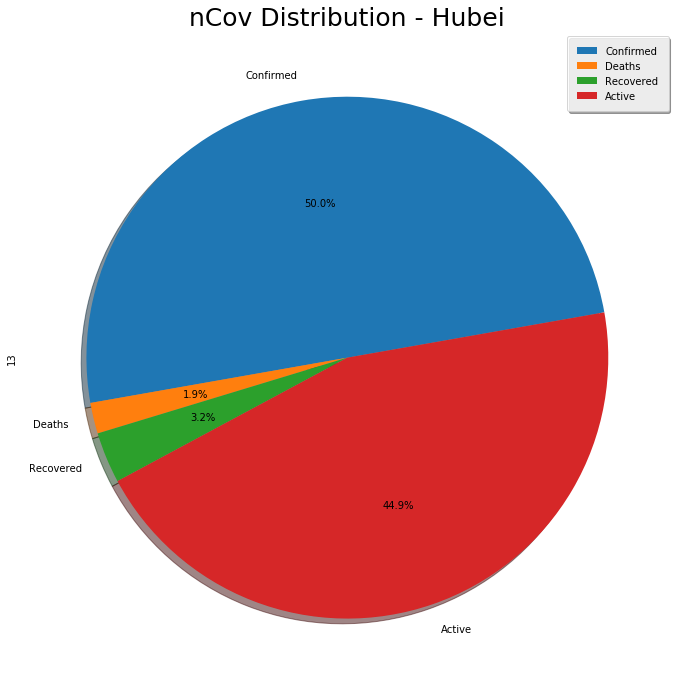

In [47]:
# pie chart for confirmed , deaths recovered and active cases.
Hubei = Hubei[['Confirmed','Deaths','Recovered', 'Active']] # Remove the state column as it does not have any numeric data
Hubei = Hubei.iloc[0]

plt.figure(figsize=(12,12))

Hubei.plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=10)

plt.title('nCov Distribution - Hubei',size=25)
plt.legend(loc = "upper right"
           , fontsize = 10
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1);

#### Hypothesis we hear about COVID-19 around these days
- It majorly comprises public-exposure
- Secondly to some extent, it also comprises the delay by a person in getting tested from the symptom date
- Through unnoticed items like your smartphones, etc. Smartphone can be an extremely vulnerable item


Diving into some more EDA to check that 

In [48]:
#creating subset of different countries for their COnfirmed , Death and Recovered cases.
ncov_italy = ncov_df[ncov_df['Country'] == 'Italy']
ncov_us = ncov_df[ncov_df['Country'] == 'US']
ncov_spain = ncov_df[ncov_df['Country'] == 'Spain']
ncov_germany = ncov_df[ncov_df['Country'] == 'Germany']
ncov_iran = ncov_df[ncov_df['Country'] == 'Iran']
ncov_france = ncov_df[ncov_df['Country'] == 'France']
ncov_uk = ncov_df[ncov_df['Country'] == 'UK']
ncov_swiss = ncov_df[ncov_df['Country'] == 'Switzerland']
ncov_soukor = ncov_df[ncov_df['Country'] == 'South Korea']

ncov_italy = pd.DataFrame(ncov_italy.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_us = pd.DataFrame(ncov_us.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_spain = pd.DataFrame(ncov_spain.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_germany = pd.DataFrame(ncov_germany.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_iran = pd.DataFrame(ncov_iran.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_france = pd.DataFrame(ncov_france.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_uk = pd.DataFrame(ncov_uk.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_swiss = pd.DataFrame(ncov_swiss.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()
ncov_soukor = pd.DataFrame(ncov_soukor.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum()).reset_index()

In [49]:
ncov_all = pd.DataFrame(ncov_df.groupby(['Country', 'ObservationDate'])['Confirmed', 'Deaths',
           'Recovered'].sum()).reset_index().drop_duplicates(subset=['Country'], keep='last')
ncov_all.reset_index(drop=True, inplace=True)
ncov_all = ncov_all.sort_values(by=['Confirmed'], ascending=False).reset_index(drop=True)
ncov_all = ncov_all.head(10)

In [51]:
#using stack bar chart for Country-wise Corona Cases & Consequences
fig = go.Figure(data=[
    go.Bar(name='Confirmed',x=ncov_all['Country'].unique(), y=ncov_all['Confirmed']),
    go.Bar(name='Deaths', x=ncov_all['Country'].unique(), y=ncov_all['Deaths']),
    go.Bar(name='Recovered', x=ncov_all['Country'].unique(), y=ncov_all['Recovered'])])

fig.layout.update(barmode='stack', title='Country-wise Corona Cases & Consequences', yaxis_showgrid=False)
fig.show()

#### How Corona Virus grow in Rest of the World

In [52]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ncov_italy['ObservationDate'], y=ncov_italy['Confirmed'], name='Italy'))
fig1.add_trace(go.Scatter(x=ncov_us['ObservationDate'], y=ncov_us['Confirmed'], name='USA'))
fig1.add_trace(go.Scatter(x=ncov_spain['ObservationDate'], y=ncov_spain['Confirmed'], name='Spain'))
fig1.add_trace(go.Scatter(x=ncov_uk['ObservationDate'], y=ncov_uk['Confirmed'], name='UK'))
fig1.add_trace(go.Scatter(x=ncov_germany['ObservationDate'], y=ncov_germany['Confirmed'], name='Germany'))
fig1.add_trace(go.Scatter(x=ncov_iran['ObservationDate'], y=ncov_iran['Confirmed'], name='Iran'))
fig1.add_trace(go.Scatter(x=ncov_france['ObservationDate'], y=ncov_france['Confirmed'], name='France'))

fig1.layout.update(title_text='COVID-19 Growth in Rest of the World',xaxis_showgrid=False, yaxis_showgrid=False, width=800,
        height=500,font=dict(
        size=12,
        color="white"
    ))
fig1.layout.plot_bgcolor = 'Black'
fig1.layout.paper_bgcolor = 'Black'
fig1.show()

In [54]:
#creating subset for Confirmed Death ratio and Confirmed Recovered cases ratio
ncov_all['CD_Ratio'] = ncov_all['Deaths']/ncov_all['Confirmed']
ncov_all['CR_Ratio'] = ncov_all['Recovered']/ncov_all['Confirmed']
ncov_all = ncov_all.round(2)
ncov_all.head()

Country ObservationDate  Confirmed   Deaths  Recovered  CD_Ratio  CR_Ratio
0       US      2020-04-11   526396.0  20463.0    31270.0      0.04      0.06
1    Spain      2020-04-11   163027.0  16606.0    59109.0      0.10      0.36
2    Italy      2020-04-11   152271.0  19468.0    32534.0      0.13      0.21
3   France      2020-04-11   130727.0  13851.0    26663.0      0.11      0.20
4  Germany      2020-04-11   124908.0   2736.0    57400.0      0.02      0.46

In [55]:
#Confirmed Cases Death Ratio plot 
ncov_all_cdr = ncov_all.sort_values(by=['CD_Ratio'], ascending=False).reset_index(drop=True)
ncov_all_crr = ncov_all.sort_values(by=['CR_Ratio'], ascending=False).reset_index(drop=True)
fig = px.bar(ncov_all_cdr, x="Country", y="CD_Ratio", color='CD_Ratio', title='Country-wise Death:Confirmed Cases Ratio')
fig.show()
#1 out of 10 person dies in Italy which is too high

In [56]:
#Confirmed Cases Recovered Ratio plot 
fig = px.bar(ncov_all_crr, x="Country", y="CR_Ratio", color='CR_Ratio', title='Country-wise Recovered:Confirmed Cases Ratio')
fig.show()

#almost 9/10 person in China is recovering.which is weird

#### Interesting Facts to be noted :
- Why China's recovery rate is so high?
- Need to understand why the deaths:confirmed ratio are so high in Iran, Italy, Spain and UK

In [57]:
# creating comparing china situation with Italy
COVID19_open_line_list_china = COVID19_open_line_list[COVID19_open_line_list['country']=='China'].dropna(subset=['age']).reset_index(drop=True)
COVID19_open_line_list_italy = COVID19_open_line_list[COVID19_open_line_list['country']=='Italy'].dropna(subset=['age']).reset_index(drop=True)
COVID19_open_line_list_china.head(2)

ID age   sex                        city province country  \
0  1.0  30  Male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47  Male  Baohe District, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)  latitude  longitude geo_resolution  ... outcome  \
0                    1.0  31.64696   117.7166         admin3  ...     NaN   
1                    1.0  31.77863   117.3319         admin3  ...     NaN   

  date_death_or_discharge notes_for_discussion location          admin3  \
0                     NaN                  NaN      NaN     Chaohu City   
1                     NaN                  NaN      NaN  Baohe District   

       admin2 admin1 country_new admin_id  data_moderator_initials  
0  Hefei City  Anhui       China   340181                      NaN  
1  Hefei City  Anhui       China   340111                      NaN  

[2 rows x 33 columns]

In [59]:
#Age Comparison of Chinese and Italians
fig = go.Figure()
fig.add_trace(go.Box(y=COVID19_open_line_list_china['age'], name='China'))
fig.add_trace(go.Box(y=COVID19_open_line_list_italy['age'], name='Italy'))
fig.update_layout(title='Age Comparison of Chinese and Italians')
fig.show()

In [60]:
#Age-Wise Chinese COVID-19 Patients
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan
    
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

    
df1_chinese = pd.DataFrame(COVID19_open_line_list_china[COVID19_open_line_list_china['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df2_chinese = pd.DataFrame(COVID19_open_line_list_china[COVID19_open_line_list_china['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df3_chinese = pd.DataFrame(COVID19_open_line_list_china[COVID19_open_line_list_china['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')

fig = go.Figure()
fig.add_trace(go.Box(y=df1_chinese['age'], name="Deceased Patients"))
fig.add_trace(go.Box(y=df2_chinese['age'], name="Discharged Patients"))
fig.add_trace(go.Box(y=df3_chinese['age'], name="Recovered Patients"))
fig.update_layout(title_text='Age-Wise Chinese COVID-19 Patients')
fig.show()

## India's situation right now

In [61]:
covid= pd.read_csv('./data/raw/Apr_13_2020/covid_19_clean_complete.csv',parse_dates=['Date'])
covid.head(2)

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0

In [62]:
# ship rows
ship_rows = covid['Province/State'].str.contains('Grand Princess') | covid['Province/State'].str.contains('Diamond Princess') | covid['Country/Region'].str.contains('Diamond Princess') | covid['Country/Region'].str.contains('MS Zaandam')

# ship
ship = covid[ship_rows]

# full table 
covid= covid[~(ship_rows)]

# Latest cases from the ships
ship_latest = ship[ship['Date']==max(ship['Date'])]

In [63]:
# Cleaning data

# Active Case = confirmed - deaths - recovered
covid['Active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']

# replacing Mainland china with just China
covid['Country/Region'] = covid['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
covid[['Province/State']] = covid[['Province/State']].fillna('')
covid[['Confirmed', 'Deaths', 'Recovered', 'Active']] = covid[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# fixing datatypes
covid['Recovered'] = covid['Recovered'].astype(int)

covid.head(6)

Province/State       Country/Region      Lat     Long       Date  Confirmed  \
0                         Afghanistan  33.0000  65.0000 2020-01-22          0   
1                             Albania  41.1533  20.1683 2020-01-22          0   
2                             Algeria  28.0339   1.6596 2020-01-22          0   
3                             Andorra  42.5063   1.5218 2020-01-22          0   
4                              Angola -11.2027  17.8739 2020-01-22          0   
5                 Antigua and Barbuda  17.0608 -61.7964 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       0  
1       0          0       0  
2       0          0       0  
3       0          0       0  
4       0          0       0  
5       0          0       0

In [64]:
#Extracting India's data 
covid_india=covid[covid['Country/Region']=="India"]

#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]

#Extracting data of neighbouring countries
covid_pak=covid[covid['Country/Region']=="Pakistan"]
covid_china=covid[covid['Country/Region']=="China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [65]:
#Converting the date into Datetime format of worst affected countries
covid_india["Date"]=pd.to_datetime(covid_india["Date"])
covid_spain["Date"]=pd.to_datetime(covid_spain["Date"])
covid_us["Date"]=pd.to_datetime(covid_us["Date"])
covid_italy["Date"]=pd.to_datetime(covid_italy["Date"])
covid_iran["Date"]=pd.to_datetime(covid_iran["Date"])
covid_france["Date"]=pd.to_datetime(covid_france["Date"])

#Converting the date into Datetime format of neighbouring countries
covid_pak["Date"]=pd.to_datetime(covid_pak["Date"])
covid_china["Date"]=pd.to_datetime(covid_china["Date"])
covid_afg["Date"]=pd.to_datetime(covid_afg["Date"])
covid_nepal["Date"]=pd.to_datetime(covid_nepal["Date"])
covid_bhutan["Date"]=pd.to_datetime(covid_bhutan["Date"])
covid_lanka["Date"]=pd.to_datetime(covid_lanka["Date"])
covid_ban["Date"]=pd.to_datetime(covid_ban["Date"])

In [66]:
#Grouping the data based on the Date of worst affected countries
india_datewise=covid_india.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

#Grouping the data based on the Date of neighbouring countries
pak_datewise=covid_pak.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [67]:
#Adding week column to perfom weekly of worst affected countries
india_datewise["WeekofYear"]=india_datewise.index.weekofyear
spain_datewise["WeekofYear"]=spain_datewise.index.weekofyear
us_datewise["WeekofYear"]=us_datewise.index.weekofyear
italy_datewise["WeekofYear"]=italy_datewise.index.weekofyear
iran_datewise["WeekofYear"]=iran_datewise.index.weekofyear
france_datewise["WeekofYear"]=france_datewise.index.weekofyear

#Adding week column to perfom weekly of neighbouring countries
pak_datewise["WeekofYear"]=pak_datewise.index.weekofyear
china_datewise["WeekofYear"]=china_datewise.index.weekofyear
afg_datewise["WeekofYear"]=afg_datewise.index.weekofyear
nepal_datewise["WeekofYear"]=nepal_datewise.index.weekofyear
bhutan_datewise["WeekofYear"]=bhutan_datewise.index.weekofyear
lanka_datewise["WeekofYear"]=lanka_datewise.index.weekofyear
ban_datewise["WeekofYear"]=ban_datewise.index.weekofyear

In [68]:
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

Text(0.5, 1.0, 'Distribution of Number of Active Cases in India over Date')

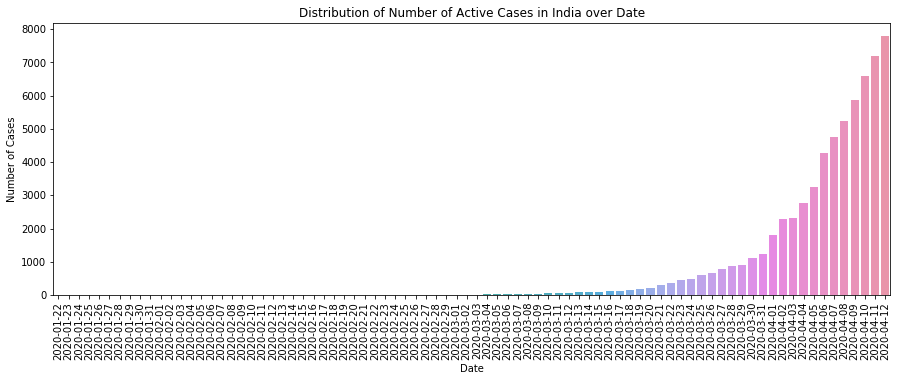

In [69]:
#Distribution of Number of Active Cases in India over Date
plt.figure(figsize=(15,5))
sns.barplot(x=india_datewise.index.date,y=india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Active Cases in India over Date")

Text(0.5, 1.0, 'Distribution of Number of Closed Cases in India over Date')

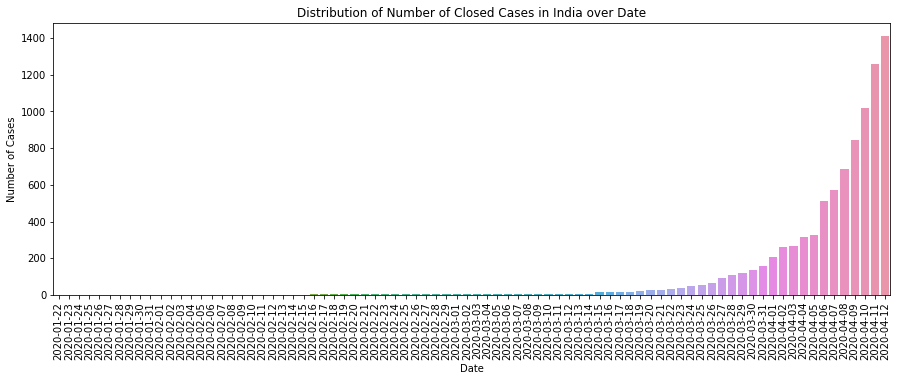

In [70]:
#Distribution of Number of Closed Cases in India over Date
plt.figure(figsize=(15,5))
sns.barplot(x=india_datewise.index.date,y=india_datewise["Recovered"]+india_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Closed Cases in India over Date")

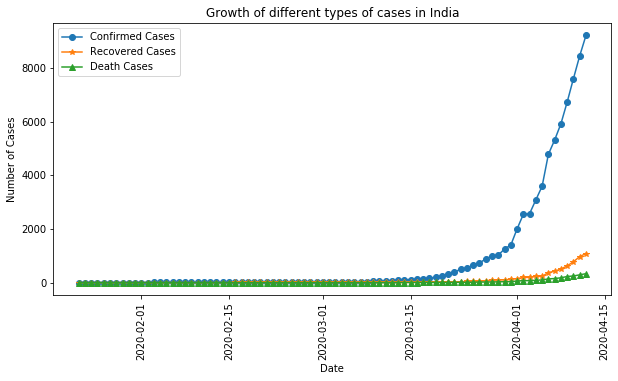

In [71]:
#Growth of different types of cases in India
plt.figure(figsize=(10,5))
plt.plot(india_datewise["Confirmed"],label="Confirmed Cases",marker='o')
plt.plot(india_datewise["Recovered"],label="Recovered Cases",marker='*')
plt.plot(india_datewise["Deaths"],label="Death Cases",marker="^")
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Growth of different types of cases in India")
plt.legend()

In [72]:
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(india_datewise["WeekofYear"].unique()):
    india_weekwise_confirmed.append(india_datewise[india_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(india_datewise[india_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(india_datewise[india_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1


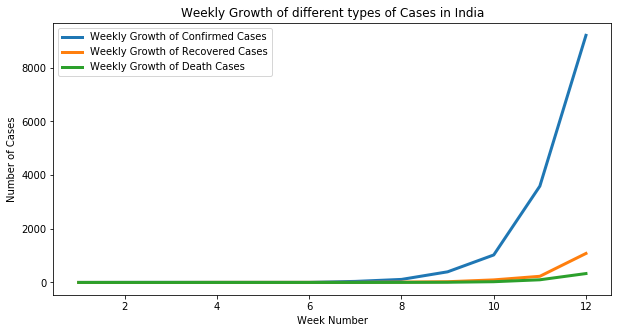

In [73]:
#Weekly Growth of different types of Cases in India
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="Weekly Growth of Confirmed Cases")
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3,label="Weekly Growth of Recovered Cases")
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,label="Weekly Growth of Death Cases")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Weekly Growth of different types of Cases in India")
plt.legend()

Average weekly increase in number of Confirmed Cases 767
Average weekly increase in number of Recovered Cases 90
Average weekly increase in number of Death Cases 28


Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

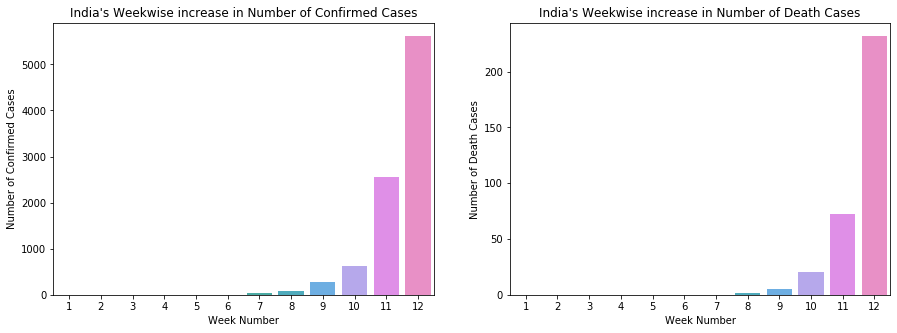

In [74]:
#India's Weekwise increase in Number of Confirmed Cases and death cases
print("Average weekly increase in number of Confirmed Cases",round(pd.Series(india_weekwise_confirmed).diff().fillna(0).mean()))
print("Average weekly increase in number of Recovered Cases",round(pd.Series(india_weekwise_recovered).diff().fillna(0).mean()))
print("Average weekly increase in number of Death Cases",round(pd.Series(india_weekwise_deaths).diff().fillna(0).mean()))

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

In [75]:
print("Number of Confirmed Cases",india_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",india_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",india_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-india_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",india_datewise["Recovered"].iloc[-1]+india_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(india_datewise["Confirmed"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(india_datewise["Recovered"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(india_datewise["Deaths"].iloc[-1]/india_datewise.shape[0]))

Number of Confirmed Cases 9205
Number of Recovered Cases 1080
Number of Death Cases 331
Number of Active Cases 7794
Number of Closed Cases 1411
Approximate Number of Confirmed Cases per day 112.0
Approximate Number of Recovered Cases per day 13.0
Approximate Number of Death Cases per day 4.0


#### Recovery Rtae vs Mortality Rate

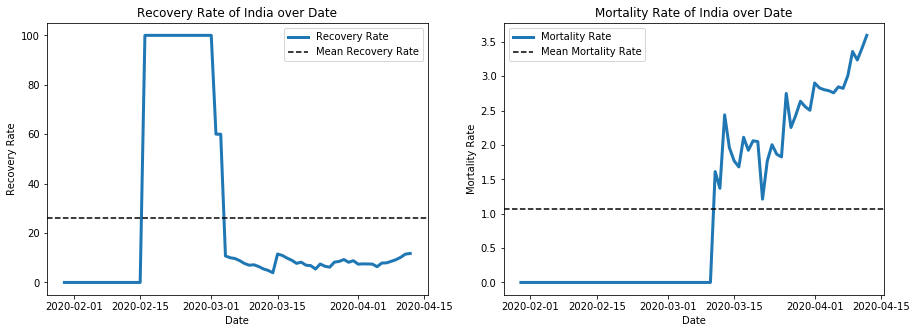

In [76]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot((india_datewise["Recovered"]/india_datewise["Confirmed"])*100,label="Recovery Rate",linewidth=3)
ax1.axhline(((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax1.set_xlabel("Date")
ax1.set_ylabel("Recovery Rate")
ax1.set_title("Recovery Rate of India over Date")
ax1.legend()
ax2.plot((india_datewise["Deaths"]/india_datewise["Confirmed"])*100,label="Mortality Rate",linewidth=3)
ax2.axhline(((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax2.set_xlabel("Date")
ax2.set_ylabel("Mortality Rate")
ax2.set_title("Mortality Rate of India over Date")
ax2.legend()


#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases
Growth Factor

Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

##### Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.


(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text xticklabel objects>)

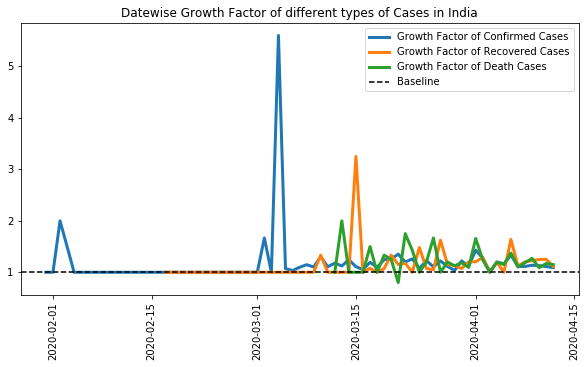

In [77]:
plt.figure(figsize=(10,5))
plt.plot(india_datewise["Confirmed"]/india_datewise["Confirmed"].shift(),linewidth=3,label="Growth Factor of Confirmed Cases")
plt.plot(india_datewise["Recovered"]/india_datewise["Recovered"].shift(),linewidth=3,label="Growth Factor of Recovered Cases")
plt.plot(india_datewise["Deaths"]/india_datewise["Deaths"].shift(),linewidth=3,label="Growth Factor of Death Cases")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.legend()
plt.title("Datewise Growth Factor of different types of Cases in India")
plt.xticks(rotation=90)

Growth Factor of Recoverd Cases is constantly very close to 1 indicating the Recovery Rate very low which was high intially, with Growth Factor of Confirmed and Death Cases well above 1 is an indication of considerable growth in both types of Cases.

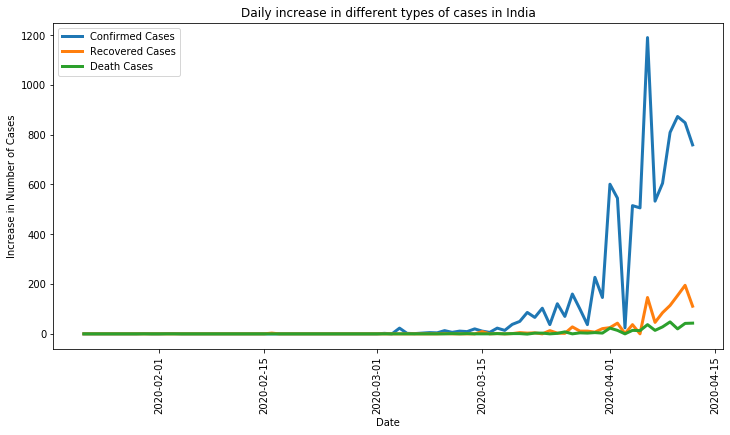

In [78]:
plt.figure(figsize=(12,6))
plt.plot(india_datewise["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases")
plt.plot(india_datewise["Recovered"].diff().fillna(0),linewidth=3,label="Recovered Cases")
plt.plot(india_datewise["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases")
plt.ylabel("Increase in Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in different types of cases in India")
plt.xticks(rotation=90)
plt.legend()

#### Comparison of India with neighbouring Countries

Text(0.5, 1.0, 'Confirmed Cases plot for Neighbouring Countries of India (Logarithmic Scale)')

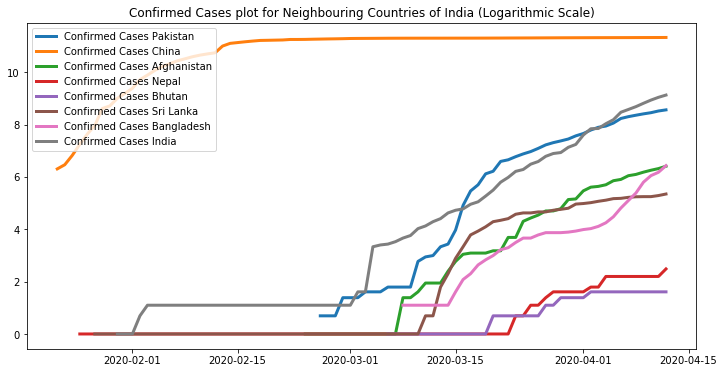

In [79]:
plt.figure(figsize=(12,6))
plt.plot(np.log(pak_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Pakistan")
plt.plot(np.log(china_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases China")
plt.plot(np.log(afg_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Afghanistan")
plt.plot(np.log(nepal_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Nepal")
plt.plot(np.log(bhutan_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Bhutan")
plt.plot(np.log(lanka_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Sri Lanka")
plt.plot(np.log(ban_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases Bangladesh")
plt.plot(np.log(india_datewise["Confirmed"]),linewidth=3,label="Confirmed Cases India")
plt.legend(loc=2)
plt.title("Confirmed Cases plot for Neighbouring Countries of India (Logarithmic Scale)")

China is the worst affected countries among the neighbouring countries of India, as we all are well aware that COVID-19 orginated in China. The flat line after a certain period is clear indication that China has been very much successful in containing the COVID-19.

India seems to be second badly affected among all neighbouring countries followed by Pakistan and Afghanistan

Bangladesh Confirmed Cases graph is taking off showing sharp increase in recent time

Sri Lanka's Confirmed Cases plot is showing a flattening in recent time, implying they have been able to got significant control over COVID-19


In [80]:
n_countries=["Pakistan","China","Afghanistan","Nepal","Bhutan","Sri Lanka","Bangladesh","India"]

In [81]:
comp_data=pd.concat([pak_datewise.iloc[[-1]],china_datewise.iloc[[-1]],afg_datewise.iloc[[-1]],nepal_datewise.iloc[[-1]],
          bhutan_datewise.iloc[[-1]],lanka_datewise.iloc[[-1]],ban_datewise.iloc[[-1]],india_datewise.iloc[[-1]]])

In [82]:
comp_data.drop(["Days Since","WeekofYear"],1,inplace=True)
comp_data.index=n_countries
comp_data["Mortality"]=(comp_data["Deaths"]/comp_data["Confirmed"])*100
comp_data["Recovery"]=(comp_data["Recovered"]/comp_data["Confirmed"])*100
comp_data["Survival Probability"]=(1-(comp_data["Deaths"]/comp_data["Confirmed"]))*100
comp_data.sort_values(["Confirmed"],ascending=False)

Confirmed  Deaths  Recovered  Mortality   Recovery  \
China            83134    3343      77956   4.021219  93.771501   
India             9205     331       1080   3.595872  11.732754   
Pakistan          5230      91       1028   1.739962  19.655832   
Bangladesh         621      34         39   5.475040   6.280193   
Afghanistan        607      18         32   2.965404   5.271829   
Sri Lanka          210       7         56   3.333333  26.666667   
Nepal               12       0          1   0.000000   8.333333   
Bhutan               5       0          2   0.000000  40.000000   

             Survival Probability  
China                   95.978781  
India                   96.404128  
Pakistan                98.260038  
Bangladesh              94.524960  
Afghanistan             97.034596  
Sri Lanka               96.666667  
Nepal                  100.000000  
Bhutan                 100.000000

In [83]:
print("Pakistan reported it's first confirm case on: ",pak_datewise.index[0].date())
print("China reported it's first confirm case on: ",china_datewise.index[0].date())
print("Afghanistan reported it's first confirm case on: ",afg_datewise.index[0].date())
print("Nepal reported it's first confirm case on: ",nepal_datewise.index[0].date())
print("Bhutan reported it's first confirm case on: ",bhutan_datewise.index[0].date())
print("Sri Lanka reported it's first confirm case on: ",lanka_datewise.index[0].date())
print("Bangladesh reported it's first confirm case on: ",ban_datewise.index[0].date())
print("India reported it's first confirm case on: ",india_datewise.index[0].date())

Pakistan reported it's first confirm case on:  2020-01-22
China reported it's first confirm case on:  2020-01-22
Afghanistan reported it's first confirm case on:  2020-01-22
Nepal reported it's first confirm case on:  2020-01-22
Bhutan reported it's first confirm case on:  2020-01-22
Sri Lanka reported it's first confirm case on:  2020-01-22
Bangladesh reported it's first confirm case on:  2020-01-22
India reported it's first confirm case on:  2020-01-22


In [84]:
print("Pakistan reported it's first death case on: ",pak_datewise[pak_datewise["Deaths"]>0].index[0].date())
print("China reported it's first death case on: ",china_datewise[china_datewise["Deaths"]>0].index[0].date())
print("Afghanistan reported it's first death case on: ",afg_datewise[afg_datewise["Deaths"]>0].index[0].date())
print("Sri Lanka reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("Bangladesh reported it's first death case on: ",lanka_datewise[lanka_datewise["Deaths"]>0].index[0].date())
print("India reported it's first death case on: ",india_datewise[india_datewise["Deaths"]>0].index[0].date())

Pakistan reported it's first death case on:  2020-03-19
China reported it's first death case on:  2020-01-22
Afghanistan reported it's first death case on:  2020-03-22
Sri Lanka reported it's first death case on:  2020-03-28
Bangladesh reported it's first death case on:  2020-03-28
India reported it's first death case on:  2020-03-11


Text(0.5, 0, 'Recovery Rate')

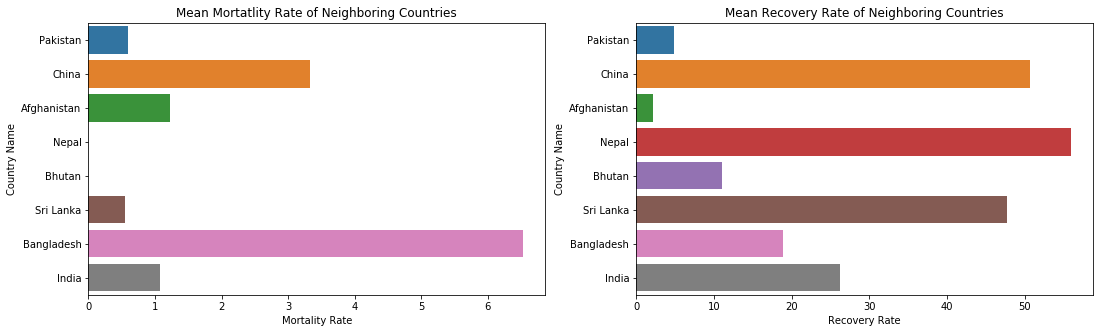

In [85]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(18,5))
mean_mortality=[((pak_datewise["Deaths"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Deaths"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Deaths"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Deaths"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Deaths"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Deaths"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Deaths"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean()]
mean_recovery=[((pak_datewise["Recovered"]/pak_datewise["Confirmed"])*100).mean(),((china_datewise["Recovered"]/china_datewise["Confirmed"])*100).mean(),
               ((afg_datewise["Recovered"]/afg_datewise["Confirmed"])*100).mean(),((nepal_datewise["Recovered"]/nepal_datewise["Confirmed"])*100).mean(),
               ((bhutan_datewise["Recovered"]/bhutan_datewise["Confirmed"])*100).mean(),((lanka_datewise["Recovered"]/lanka_datewise["Confirmed"])*100).mean(),
               ((ban_datewise["Recovered"]/ban_datewise["Confirmed"])*100).mean(),((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean()]

comp_data["Mean Mortality Rate"]=mean_mortality
comp_data["Mean Recovery Rate"]=mean_recovery


sns.barplot(x=comp_data["Mean Mortality Rate"],y=comp_data.index,ax=ax1)
ax1.set_title("Mean Mortatlity Rate of Neighboring Countries")
ax1.set_ylabel("Country Name")
ax1.set_xlabel("Mortality Rate")
sns.barplot(x=comp_data["Mean Recovery Rate"],y=comp_data.index,ax=ax2)
ax2.set_title("Mean Recovery Rate of Neighboring Countries")
ax2.set_ylabel("Country Name")
ax2.set_xlabel("Recovery Rate")

#Mean Recovery Rate graph is a conclusive evidence of China has been able to flatten the curve.

#Mean Mortality Rate graph is indication that China and Bangladesh are the worst affected among the neighbours

Mean Mortality Rate of Neighbouring Countries:  2.4442301118923253
Median Mortality Rate of Neighbouring Countries:  2.9654036243822075
Mortality Rate in India:  4.021218755262588


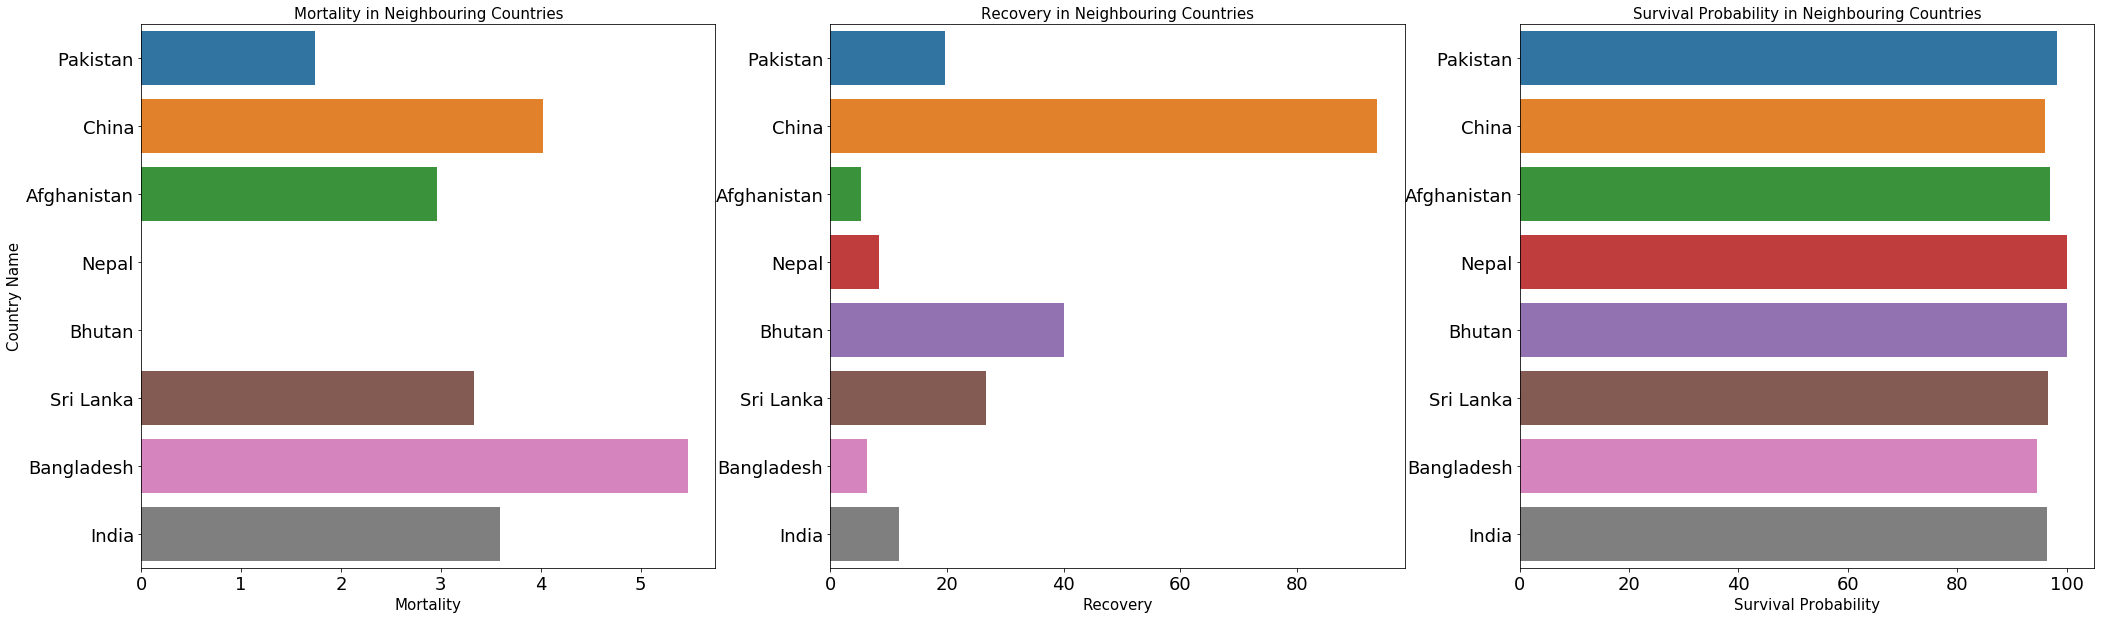

In [86]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(35,10))
sns.barplot(y=comp_data.index,x=comp_data["Mortality"],ax=ax1)
ax1.set_ylabel("Country Name",fontsize=15)
ax1.set_xlabel("Mortality",fontsize=15)
ax1.set_title("Mortality in Neighbouring Countries",fontsize=15)
sns.barplot(y=comp_data.index,x=comp_data["Recovery"],ax=ax2)
ax2.set_xlabel("Recovery",fontsize=15)
ax2.set_title("Recovery in Neighbouring Countries",fontsize=15)
sns.barplot(y=comp_data.index,x=comp_data["Survival Probability"],ax=ax3)
ax3.set_xlabel("Survival Probability",fontsize=15)
ax3.set_title("Survival Probability in Neighbouring Countries",fontsize=15)
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)

print("Mean Mortality Rate of Neighbouring Countries: ",comp_data["Mortality"].drop(comp_data.index[1],0).mean())
print("Median Mortality Rate of Neighbouring Countries: ",comp_data["Mortality"].drop(comp_data.index[1],0).median())
print("Mortality Rate in India: ",comp_data.ix[1]["Mortality"])

Survival Probablity of all the neighbours looks Great as it is well above 90%! China, Sri Lanka and Bangladesh are the countries which have faced heat of COVID-19 among all neighbouring countries.

Nepal and Bhutan have not reported any Death Case till date, with really low number of Confirmed Cases, hopefully the will be able to come out of it possibly in few days, good Recovery Rate is clear indication of it.

Except China, all the neighbouring countries including India seems to face tough time containing COVID-19. Bhutan and Nepal are exception as they have really low number of Confired Cases.


Median Age of Neighbouring Countries (2020) Source: https://ourworldindata.org/age-structure


#### Median age, Tourist Data and International Students data has some interesting story to tell

High Median age is an clear indication, that majority of the population belong to old age group. China and India are the most densely populated countries with high median age indicating high share of population belonging to old group compared to other countries and these the countires which are badly affected by COVID-19 among all neighbours.

Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/

International Students: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/

Also Tourist data is clear indication of China and India having maximum number of foreign visitors among all neighbour countries of India also having really high number of International Students.

#### Percentage GDP has interesting thing about Recoverd Number of Cases

Countrywise GDP Data: https://www.worldometers.info/gdp/gdp-by-country/


In [87]:
n_median_age=[23.5,38.7,18.6,25,28.6,34.1,27.5, 28.2]
n_tourist=[907000,59270000,0,753000,210000,2051000,303000,14570000]
n_gdp=[0.38,15.12,0.02,0.03,0.00,0.11,0.31,3.28]
comp_data["Median Age"]=n_median_age
comp_data["Tourists"]=n_tourist
comp_data["GDP"]=n_gdp
print("Carl Pearson's Co-efficient for Number Confirmed Cases and Median Age: ",comp_data["Confirmed"].corr(comp_data["Median Age"]))
print("Carl Pearson's Co-efficient for Number Confirmed Cases and Number of Visitng Tourists:",comp_data["Confirmed"].corr(comp_data["Tourists"]))
print("Carl Pearson's Co-efficient for Number Death Cases and Median Age: ",comp_data["Deaths"].corr(comp_data["Median Age"]))
print("Carl Pearson's Co-efficient for Number Death Cases and Number of Visitng Tourists:",comp_data["Deaths"].corr(comp_data["Tourists"]))

Carl Pearson's Co-efficient for Number Confirmed Cases and Median Age:  0.6878575666982826
Carl Pearson's Co-efficient for Number Confirmed Cases and Number of Visitng Tourists: 0.9882546019420114
Carl Pearson's Co-efficient for Number Death Cases and Median Age:  0.6960422617132765
Carl Pearson's Co-efficient for Number Death Cases and Number of Visitng Tourists: 0.9886371323754348


In [88]:
print("Carl Person's Co-efficient for Number of Recovered Cases and Percetage GDP of country",
      comp_data["Recovered"].corr(comp_data["GDP"]))

Carl Person's Co-efficient for Number of Recovered Cases and Percetage GDP of country 0.9800326766870631


Median Age and Number of Visiting Tourists, both of them show a pretty strong postive correlation with Number of Confirmed as well as Death Cases.

Percentage GDP has really high correlation with number of Recoverd Cases, countries having strong economy tend to have more number of Recovered Cases

#### Comparison of India with rest of world countries badly affected by the Pendemic

In [89]:
country_names=["Spain","USA","Italy","Iran","France","India"]
country_data=pd.concat([spain_datewise.iloc[[-1]],us_datewise.iloc[[-1]],italy_datewise.iloc[[-1]],iran_datewise.iloc[[-1]],
          france_datewise.iloc[[-1]],india_datewise.iloc[[-1]]])
country_data=country_data.drop(["Days Since","WeekofYear"],1)
country_data["Mortality"]=(country_data["Deaths"]/country_data["Confirmed"])*100
country_data["Recovery"]=(country_data["Recovered"]/country_data["Confirmed"])*100
country_data.index=country_names
country_data

Confirmed  Deaths  Recovered  Mortality   Recovery
Spain      166831   17209      62391  10.315229  37.397726
USA        555313   22020      32988   3.965331   5.940434
Italy      156363   19899      34211  12.726156  21.879217
Iran        71686    4474      43894   6.241107  61.230924
France     133670   14412      27469  10.781776  20.549862
India        9205     331       1080   3.595872  11.732754

It took 44 days in Spain to reach number of Confirmed Cases equivalent to India
It took 57 days in USA to reach number of Confirmed Cases equivalent to India
It took 39 days in Italy to reach number of Confirmed Cases equivalent to India
It took 22 days in Iran to reach number of Confirmed Cases equivalent to India
It took 55 days in France to reach number of Confirmed Cases equivalent to India
It took 74 days in India to reach 9205 Confirmed Cases


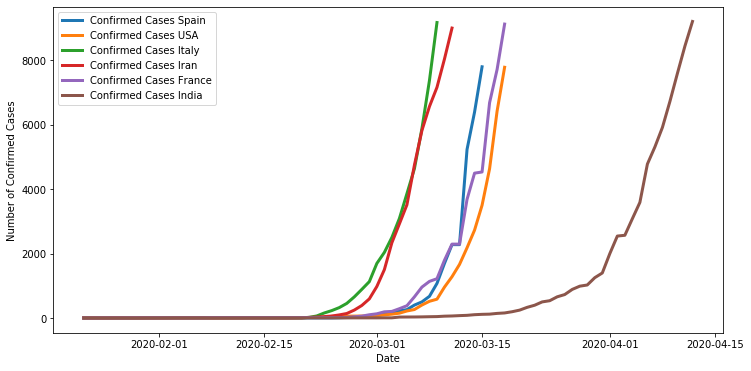

In [90]:
max_confirm_india=india_datewise["Confirmed"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Confirmed"]>0)&(spain_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Confirmed"]>0)&(us_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Confirmed"]>0)&(italy_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Confirmed"]>0)&(iran_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in Iran to reach number of Confirmed Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Confirmed"]>0)&(france_datewise["Confirmed"]<=max_confirm_india)].shape[0],"days in France to reach number of Confirmed Cases equivalent to India")
print("It took",india_datewise[india_datewise["Confirmed"]>0].shape[0],"days in India to reach",max_confirm_india,"Confirmed Cases")

plt.figure(figsize=(12,6))
max_confirm_india=india_datewise["Confirmed"].iloc[-1]
plt.plot(spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
plt.plot(us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
plt.plot(italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
plt.plot(iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],label="Confirmed Cases Iran",linewidth=3)
plt.plot(france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"],label="Confirmed Cases France",linewidth=3)
plt.plot(india_datewise["Confirmed"],label="Confirmed Cases India",linewidth=3)
plt.ylabel("Number of Confirmed Cases")
plt.xlabel("Date")
plt.legend()

It took 54 days in Spain to reach number of Deaths Cases equivalent to India
It took 60 days in USA to reach number of Deaths Cases equivalent to India
It took 46 days in Italy to reach number of Deaths Cases equivalent to India
It took 49 days in Iran to reach number of Deaths Cases equivalent to India
It took 58 days in France to reach number of Deaths Cases equivalent to India
It took 82 days in India to reach 331 Deaths Cases


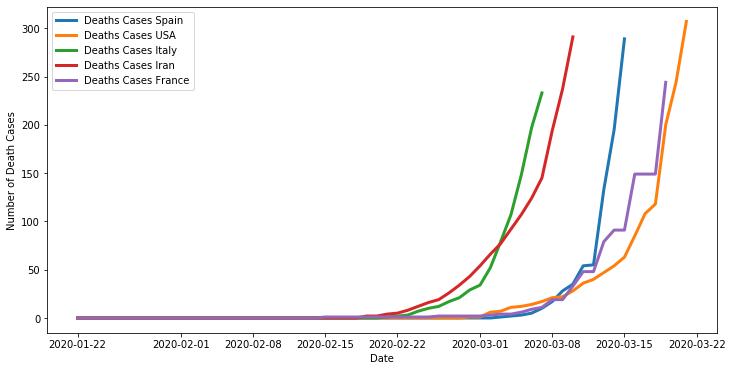

In [92]:
max_deaths_india=india_datewise["Deaths"].iloc[-1]
print("It took",spain_datewise[(spain_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Spain to reach number of Deaths Cases equivalent to India")
print("It took",us_datewise[(us_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in USA to reach number of Deaths Cases equivalent to India")
print("It took",italy_datewise[(italy_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Italy to reach number of Deaths Cases equivalent to India")
print("It took",iran_datewise[(iran_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in Iran to reach number of Deaths Cases equivalent to India")
print("It took",france_datewise[(france_datewise["Deaths"]<=max_deaths_india)].shape[0],"days in France to reach number of Deaths Cases equivalent to India")
print("It took",india_datewise.shape[0],"days in India to reach",max_deaths_india,"Deaths Cases")

plt.figure(figsize=(12,6))
max_deaths_india=india_datewise["Deaths"].iloc[-1]
plt.plot(spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"],label="Deaths Cases Spain",linewidth=3)
plt.plot(us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"],label="Deaths Cases USA",linewidth=3)
plt.plot(italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"],label="Deaths Cases Italy",linewidth=3)
plt.plot(iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"],label="Deaths Cases Iran",linewidth=3)
plt.plot(france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"],label="Deaths Cases France",linewidth=3)
plt.ylabel("Number of Death Cases")
plt.xlabel("Date")
plt.legend()

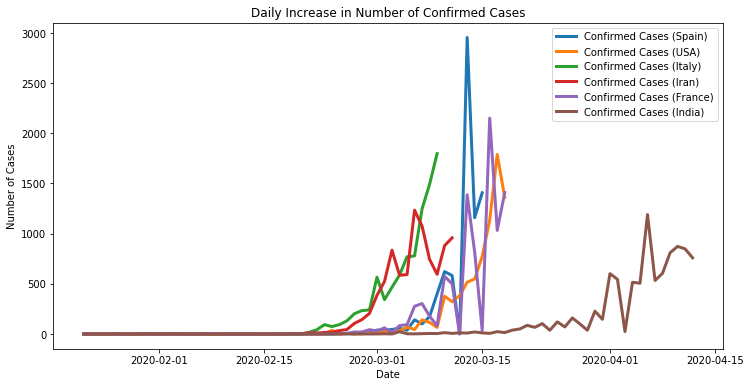

In [93]:
plt.figure(figsize=(12,6))
plt.plot(spain_datewise[spain_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (Spain)")
plt.plot(us_datewise[us_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (USA)")
plt.plot(italy_datewise[italy_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (Italy)")
plt.plot(iran_datewise[iran_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (Iran)")
plt.plot(france_datewise[france_datewise["Confirmed"]<=max_confirm_india]["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (France)")
plt.plot(india_datewise["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases (India)")
plt.title("Daily Increase in Number of Confirmed Cases")
plt.ylabel("Number of Cases")
plt.xlabel('Date')
plt.legend()

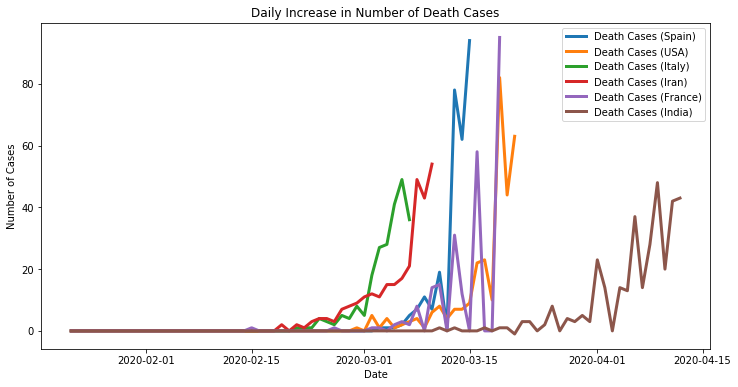

In [94]:
plt.figure(figsize=(12,6))
plt.plot(spain_datewise[spain_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (Spain)")
plt.plot(us_datewise[us_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (USA)")
plt.plot(italy_datewise[italy_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (Italy)")
plt.plot(iran_datewise[iran_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (Iran)")
plt.plot(france_datewise[france_datewise["Deaths"]<=max_deaths_india]["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (France)")
plt.plot(india_datewise["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases (India)")
plt.ylabel("Number of Cases")
plt.xlabel('Date')
plt.title("Daily Increase in Number of Death Cases")
plt.legend()

In [95]:
week_num_spain=[]
spain_weekwise_confirmed=[]
spain_weekwise_recovered=[]
spain_weekwise_deaths=[]
w=1
for i in list(spain_datewise["WeekofYear"].unique()):
    spain_weekwise_confirmed.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    spain_weekwise_recovered.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    spain_weekwise_deaths.append(spain_datewise[spain_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_spain.append(w)
    w=w+1

week_num_us=[]
us_weekwise_confirmed=[]
us_weekwise_recovered=[]
us_weekwise_deaths=[]
w=1
for i in list(us_datewise["WeekofYear"].unique()):
    us_weekwise_confirmed.append(us_datewise[us_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    us_weekwise_recovered.append(us_datewise[us_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    us_weekwise_deaths.append(us_datewise[us_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_us.append(w)
    w=w+1

week_num_italy=[]
italy_weekwise_confirmed=[]
italy_weekwise_recovered=[]
italy_weekwise_deaths=[]
w=1
for i in list(italy_datewise["WeekofYear"].unique()):
    italy_weekwise_confirmed.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    italy_weekwise_recovered.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    italy_weekwise_deaths.append(italy_datewise[italy_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_italy.append(w)
    w=w+1
    
week_num_iran=[]
iran_weekwise_confirmed=[]
iran_weekwise_recovered=[]
iran_weekwise_deaths=[]
w=1
for i in list(iran_datewise["WeekofYear"].unique()):
    iran_weekwise_confirmed.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    iran_weekwise_recovered.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    iran_weekwise_deaths.append(iran_datewise[iran_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_iran.append(w)
    w=w+1
    
week_num_france=[]
france_weekwise_confirmed=[]
france_weekwise_recovered=[]
france_weekwise_deaths=[]
w=1
for i in list(france_datewise["WeekofYear"].unique()):
    france_weekwise_confirmed.append(france_datewise[france_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    france_weekwise_recovered.append(france_datewise[france_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    france_weekwise_deaths.append(france_datewise[france_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_france.append(w)
    w=w+1

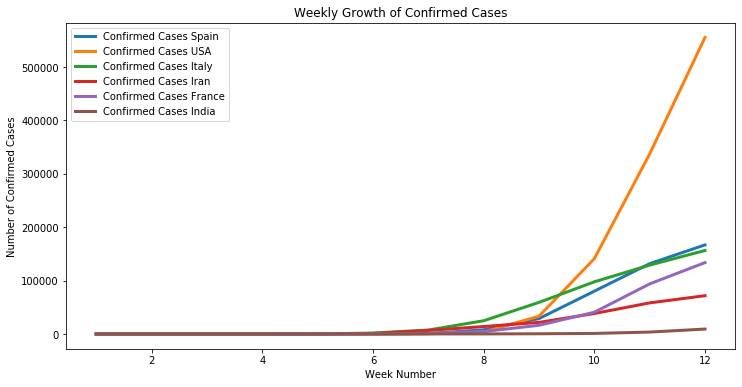

In [96]:
plt.figure(figsize=(12,6))
plt.plot(week_num_spain,spain_weekwise_confirmed,linewidth=3,label="Confirmed Cases Spain")
plt.plot(week_num_us,us_weekwise_confirmed,linewidth=3,label="Confirmed Cases USA")
plt.plot(week_num_italy,italy_weekwise_confirmed,linewidth=3,label="Confirmed Cases Italy")
plt.plot(week_num_iran,iran_weekwise_confirmed,linewidth=3,label="Confirmed Cases Iran")
plt.plot(week_num_france,france_weekwise_confirmed,linewidth=3,label="Confirmed Cases France")
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="Confirmed Cases India")
plt.title("Weekly Growth of Confirmed Cases")
plt.xlabel("Week Number")
plt.ylabel("Number of Confirmed Cases")
plt.legend()

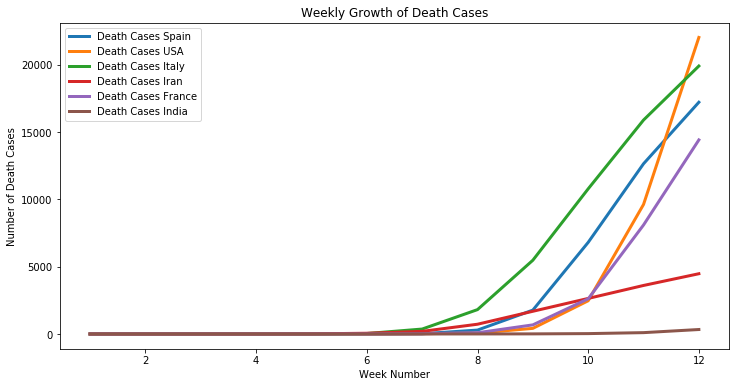

In [97]:
plt.figure(figsize=(12,6))
plt.plot(week_num_spain,spain_weekwise_deaths,linewidth=3,label="Death Cases Spain")
plt.plot(week_num_us,us_weekwise_deaths,linewidth=3,label="Death Cases USA")
plt.plot(week_num_italy,italy_weekwise_deaths,linewidth=3,label="Death Cases Italy")
plt.plot(week_num_iran,iran_weekwise_deaths,linewidth=3,label="Death Cases Iran")
plt.plot(week_num_france,france_weekwise_deaths,linewidth=3,label="Death Cases France")
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,label="Death Cases India")
plt.title("Weekly Growth of Death Cases")
plt.xlabel("Week Number")
plt.ylabel("Number of Death Cases")
plt.legend()

Text(0.5, 1.0, 'Weekly increase in confirmed Cases in India wrt other countries')

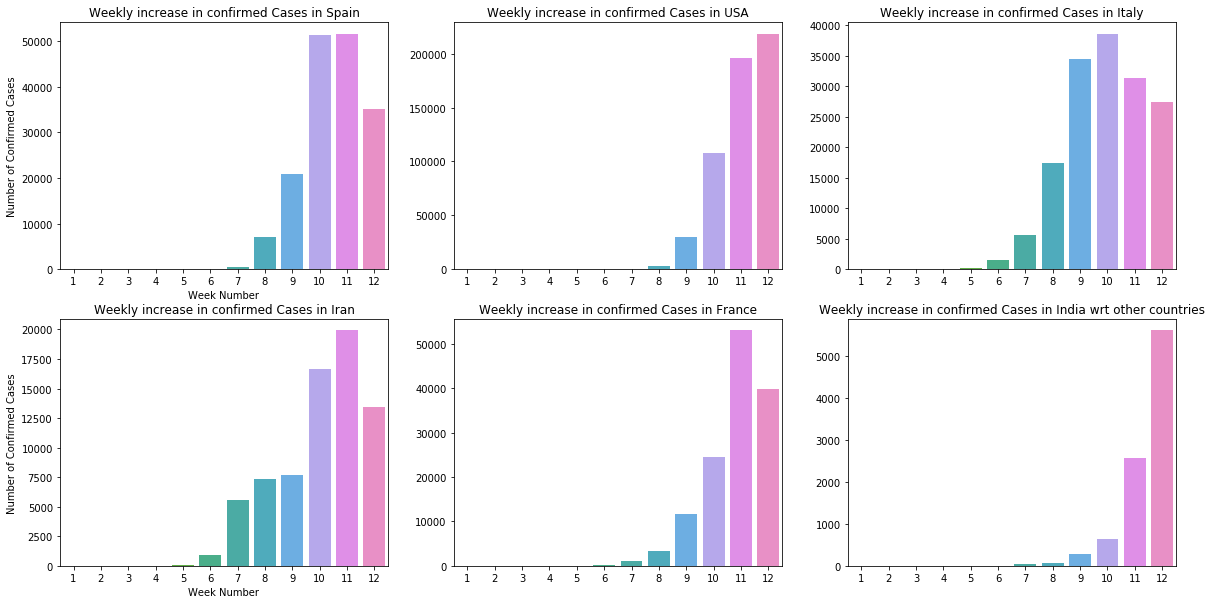

In [99]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(20,10))
sns.barplot(week_num_spain,pd.Series(spain_weekwise_confirmed).diff().fillna(0),ax=ax1)
ax1.set_title("Weekly increase in confirmed Cases in Spain")
ax1.set_ylabel("Number of Confirmed Cases")
ax1.set_xlabel("Week Number")
sns.barplot(week_num_us,pd.Series(us_weekwise_confirmed).diff().fillna(0),ax=ax2)
ax2.set_title("Weekly increase in confirmed Cases in USA")
sns.barplot(week_num_italy,pd.Series(italy_weekwise_confirmed).diff().fillna(0),ax=ax3)
ax3.set_title("Weekly increase in confirmed Cases in Italy")
sns.barplot(week_num_iran,pd.Series(iran_weekwise_confirmed).diff().fillna(0),ax=ax4)
ax4.set_title("Weekly increase in confirmed Cases in Iran")
ax4.set_ylabel("Number of Confirmed Cases")
ax4.set_xlabel("Week Number")
sns.barplot(week_num_france,pd.Series(france_weekwise_confirmed).diff().fillna(0),ax=ax5)
ax5.set_title("Weekly increase in confirmed Cases in France")
sns.barplot(week_num_india,pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax6)
ax6.set_title("Weekly increase in confirmed Cases in India wrt other countries")

### Current India Situation 

In [100]:
df_india= pd.read_csv('./data/raw/Apr_13_2020/Covid cases in India.csv')
dbd_India = pd.read_excel('./data/raw/Apr_13_2020/per_day_cases.xlsx',sheet_name='India')
dbd_tc_india = pd.read_excel('./data/raw/Apr_13_2020/COVID19 India Complete Dataset April 2020.xlsx', 
                             sheet_name='Daily Cases Time-Series')

In [101]:
dbd_tc_india.head(2)

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0 2020-01-30                1                1                0   
1 2020-01-31                0                1                0   

   Total Recovered  Daily Deceased  Total Deceased  
0                0               0               0  
1                0               0               0

In [102]:
dbd_India.head(2)

Date  Total Cases  New Cases  Days after surpassing 100 cases
0 2020-01-30            1          1                              NaN
1 2020-01-31            1          0                              NaN

In [103]:
db_india = pd.DataFrame(dbd_tc_india.groupby(['Date'])['Total Confirmed'].sum()).reset_index()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=db_india['Date'], y=db_india['Total Confirmed']))
fig1.layout.update(title_text='COVID-19 Growth in India',xaxis_showgrid=False, yaxis_showgrid=False, 
                   width=800,height=500,font=dict(size=12,color="white"))
fig1.layout.plot_bgcolor = 'Black'
fig1.layout.paper_bgcolor = 'Black'
fig1.show()

Although the curve is in the trend of going up exponentially, however the no. of cases have not increased drastically as compared to the Western countries

Following are the possible hypothesis:
- No. of testings done are less as compared to other countries
- Community transmission never got triggered in India maybe because of climatic conditions or some other factors that we might be missing out on?
- No community transmission happening yet
- People here are more immunized(21 day lockdown?)

#### State-Wise Analysis

In [104]:
db_state_india = pd.read_excel('./data/raw/Apr_13_2020/COVID19 India Complete Dataset April 2020.xlsx', 
                               sheet_name='State-Wise Data')
db_state_india = db_state_india[db_state_india['State']!='Total']
db_state_india.head(2)

State  Unnamed: 1  Confirmed  Recovered Deaths               Active  \
1  Maharashtra         NaN       1761        208    127  1903-11-26 00:00:00   
2   Tamil Nadu         NaN        969         44     10  1902-07-03 00:00:00   

    Last_Updated_Time State_code  Delta_Confirmed  Delta_Recovered  \
1 2020-04-11 22:35:24         MH                0                0   
2 2020-04-11 18:55:24         TN                0                0   

   Delta_Deaths  
1             0  
2             0

In [105]:
#Total Confirmed Cases state wise
fig = px.bar(db_state_india.sort_values('Confirmed', ascending=False).sort_values('Confirmed', ascending=True),
             x="Confirmed", y="State", 
             title='Total Confirmed Cases', 
             text='Confirmed', 
             orientation='h', 
             width=800, height=800, range_x = [0, max(db_state_india['Confirmed'])])
fig.update_traces(marker_color='#670404', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='#CDCCA7')
fig.show()

In [110]:
#COVID Testing scenario in INDIA
dbd_testing_india = pd.read_excel('./data/raw/Apr_13_2020/COVID19 India Complete Dataset April 2020.xlsx',
                                  sheet_name='ICMR Testing Count')
dbd_testing_india['Update Time Stamp'] = pd.to_datetime(dbd_testing_india['Update Time Stamp'], format='%d/%m/%Y %I:%M: %p')
dbd_testing_india.head(2)

Update Time Stamp  Total Samples Tested  Total Individuals Tested  \
0 2020-03-13 00:00:00                6500.0                    5900.0   
1 2020-03-18 18:00:00               13125.0                   12235.0   

   Total Positive Cases  Tests conducted by Private Labs  \
0                  78.0                              NaN   
1                 150.0                              NaN   

   Sample Reported today  Positive cases from samples reported  \
0                    NaN                                   NaN   
1                    NaN                                   NaN   

                                    Source  
0       Press_Release_ICMR_13March2020.pdf  
1  ICMR_website_update_18March_6PM_IST.pdf

In [107]:
#hospital bed scenario
df_hos_bed = dbd_testing_india.rename(columns={'Update Time Stamp':'DateTime', 
                                               'Total Individuals Tested':'TotalIndividualsTested', 
                                               'Total Positive Cases':\
                                                'TotalPositiveCases'}).copy()
df_hos_bed['DateTime'] = df_hos_bed['DateTime'].dt.date
df_hos_bed.head()

DateTime  Total Samples Tested  TotalIndividualsTested  \
0  2020-03-13                6500.0                  5900.0   
1  2020-03-18               13125.0                 12235.0   
2  2020-03-19               13316.0                 12426.0   
3  2020-03-19               14175.0                 13285.0   
4  2020-03-20               14376.0                 13486.0   

   TotalPositiveCases  Tests conducted by Private Labs  Sample Reported today  \
0                78.0                              NaN                    NaN   
1               150.0                              NaN                    NaN   
2               168.0                              NaN                    NaN   
3               182.0                              NaN                    NaN   
4               206.0                              NaN                    NaN   

   Positive cases from samples reported  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

                                        Source  
0           Press_Release_ICMR_13March2020.pdf  
1      ICMR_website_update_18March_6PM_IST.pdf  
2  ICMR_website_update_19March_10AM_IST_V2.pdf  
3      ICMR_website_update_19March_6PM_IST.pdf  
4     ICMR_website_update_20March_10AM_IST.pdf

In [108]:
df_hos_bed['totalnegative'] = df_hos_bed['TotalIndividualsTested'] - df_hos_bed['TotalPositiveCases']

In [109]:
df_hos_bed_per_day = df_hos_bed.drop_duplicates(subset=['DateTime'], keep='last')
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
df_hos_bed_per_day.head()

DateTime  Total Samples Tested  TotalIndividualsTested  \
0  2020-03-13                6500.0                  5900.0   
1  2020-03-18               13125.0                 12235.0   
3  2020-03-19               14175.0                 13285.0   
5  2020-03-20               15404.0                 14514.0   
7  2020-03-21               16911.0                 16021.0   

   TotalPositiveCases  Tests conducted by Private Labs  Sample Reported today  \
0                78.0                              NaN                    NaN   
1               150.0                              NaN                    NaN   
3               182.0                              NaN                    NaN   
5               236.0                              NaN                    NaN   
7               315.0                              NaN                    NaN   

   Positive cases from samples reported  \
0                                   NaN   
1                                   NaN   
3                                   NaN   
5                                   NaN   
7                                   NaN   

                                    Source  totalnegative  \
0       Press_Release_ICMR_13March2020.pdf         5822.0   
1  ICMR_website_update_18March_6PM_IST.pdf        12085.0   
3  ICMR_website_update_19March_6PM_IST.pdf        13103.0   
5  ICMR_website_update_20March_6PM_IST.pdf        14278.0   
7  ICMR_website_update_21March_6PM_IST.pdf        15706.0   

   test_results_posratio  
0                  0.013  
1                  0.012  
3                  0.014  
5                  0.016  
7                  0.020

In [111]:
df_indi = pd.read_csv('./data/raw/Apr_13_2020/IndividualDetails.csv')
df_indi.head(2)

id government_id diagnosed_date  age gender detected_city  \
0   0      KL-TS-P1     30/01/2020   20      F      Thrissur   
1   1      KL-AL-P1     02/02/2020  NaN    NaN     Alappuzha   

  detected_district detected_state nationality current_status  \
0          Thrissur         Kerala       India      Recovered   
1         Alappuzha         Kerala       India      Recovered   

  status_change_date                 notes  
0         14/02/2020  Travelled from Wuhan  
1         14/02/2020  Travelled from Wuhan

In [112]:
df_indi.dropna(subset=['current_status', 'age'], inplace=True)
df_indi.reset_index(drop=True, inplace=True)

In [113]:
df_indi['current_status'].unique(), df_indi.shape

(array(['Recovered', 'Hospitalized', 'Deceased'], dtype=object), (1190, 12))

In [114]:
df1_indians = df_indi[df_indi['current_status'] == 'Deceased']
df2_indians = df_indi[df_indi['current_status'] == 'Hospitalized']
df3_indians = df_indi[df_indi['current_status'] == 'Recovered']

fig = go.Figure()
fig.add_trace(go.Box(y=df1_indians['age'], name="Deceased Patients"))
fig.add_trace(go.Box(y=df2_indians['age'], name="Hospitalized Patients"))
fig.add_trace(go.Box(y=df3_indians['age'], name="Recovered Patients"))
fig.update_layout(title_text='Indian COVID-19 Patients Outcome Age-Wise')
fig.show()

#outcome trends are some what similar to China w.r.t. Age

In [115]:
#travel history analysis
pep_no_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == False]
pep_with_trav_his = df_indi[df_indi['notes'].str.contains('Travel') == True]

In [116]:
df_indi['id'].nunique(), pep_no_trav_his['id'].nunique()

(1190, 581)

In [118]:
#checkinh how many people with or without travel history get effected.
colors = ['#B5B200', '#1300B5']
negative = round(pep_no_trav_his['id'].nunique()/df_indi['id'].nunique()*100, 2)
positive = round(pep_with_trav_his['id'].nunique()/df_indi['id'].nunique()*100, 2)
                         
fig = px.pie(pep_no_trav_his, values=[negative, positive], names=['Patients without Travel History', 
                                                                  'Patients with Travel History'], \
                                                              title='Patients with and without Travel History')
fig.show()

# Have to think of reasons that patients without travel history got infected?

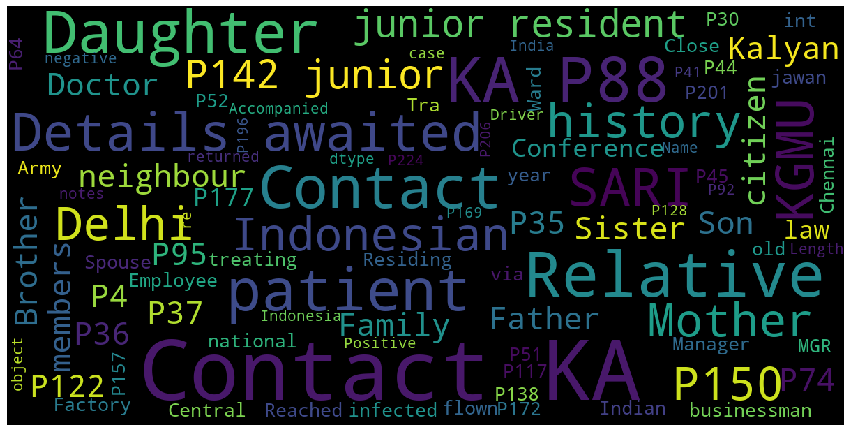

In [119]:
#creating world cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(pep_no_trav_his['notes'].apply(lambda x: x.replace('travel', '')))

- From the notes it seems the other patients without any travel history, who have been affected are mainly the closed ones of the patients with travel history and few other the emercy service person like Doctors

#### Test Results in India

In [120]:
colors = ['#269A06', '#AF0E06']
df_hos_bed_per_day_clean = df_hos_bed_per_day.dropna(subset=['TotalPositiveCases']).reset_index(drop=True)
df_hos_bed_per_day_clean['TotalIndividualsTested'].fillna(df_hos_bed_per_day_clean['Total Samples Tested']-900,
                                                          inplace=True)
df_hos_bed_per_day_clean['totalnegative'] = df_hos_bed_per_day_clean['TotalIndividualsTested'] - df_hos_bed_per_day_clean['TotalPositiveCases']
negative = round(df_hos_bed_per_day_clean['totalnegative'].sum()/df_hos_bed_per_day_clean['TotalIndividualsTested'].sum()*100, 2)
positive = round(df_hos_bed_per_day_clean['TotalPositiveCases'].sum()/df_hos_bed_per_day_clean['TotalIndividualsTested'].sum()*100, 2)
fig = go.Figure(data=[go.Pie(labels=['People who tested Negative','People who tested Positive'],
                             values= [negative,positive],hole =.5)])
                          

fig.update_traces(title_text='COVID19 Test Results', hoverinfo='label+percent', 
                  textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

In [121]:
df_hos_bed_per_day = df_hos_bed_per_day.dropna(subset=['TotalPositiveCases']).reset_index(drop=True)
df_hos_bed_per_day['TotalIndividualsTested'].fillna(df_hos_bed_per_day['Total Samples Tested']-900, 
                                                    inplace=True)
df_hos_bed_per_day['test_results_posratio'] = round(df_hos_bed_per_day['TotalPositiveCases']/df_hos_bed_per_day['TotalIndividualsTested'], 3)
df_hos_bed_per_day.head(2)

DateTime  Total Samples Tested  TotalIndividualsTested  \
0  2020-03-13                6500.0                  5900.0   
1  2020-03-18               13125.0                 12235.0   

   TotalPositiveCases  Tests conducted by Private Labs  Sample Reported today  \
0                78.0                              NaN                    NaN   
1               150.0                              NaN                    NaN   

   Positive cases from samples reported  \
0                                   NaN   
1                                   NaN   

                                    Source  totalnegative  \
0       Press_Release_ICMR_13March2020.pdf         5822.0   
1  ICMR_website_update_18March_6PM_IST.pdf        12085.0   

   test_results_posratio  
0                  0.013  
1                  0.012

In [122]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df_hos_bed_per_day['DateTime'], y=df_hos_bed_per_day['test_results_posratio']*100,
                          name='Confirmed Cases', \
                          marker=dict(color='#D32210')))
fig1.layout.update(title_text='COVID-19 Positive Detection per Test Ratio in India w.r.t. Time',
                   xaxis_showgrid=False, width=700, yaxis_title='% of Patients Tested +ve',
                   height=500,font=dict(size=12,color="white"))
fig1.layout.plot_bgcolor = '#097E99'
fig1.layout.paper_bgcolor = '#097E99'
fig1.show()

In [123]:
dbd_tc_india.rename(columns={'Daily Confirmed':'New Cases'}, inplace=True)
dbd_tc_india.head(2)

Date  New Cases  Total Confirmed  Daily Recovered  Total Recovered  \
0 2020-01-30          1                1                0                0   
1 2020-01-31          0                1                0                0   

   Daily Deceased  Total Deceased  
0               0               0  
1               0               0

In [124]:
ss = []
for i in dbd_tc_india.index:
    if(i!= min(dbd_tc_india.index)):
        lm = dbd_tc_india.loc[i]['New Cases']/dbd_tc_india.loc[i-1]['New Cases']
    else:
        lm = np.NaN
    ss.append(lm)
        
dbd_tc_india['Growth_Rate'] = ss
dbd_tc_india.head(2)

Date  New Cases  Total Confirmed  Daily Recovered  Total Recovered  \
0 2020-01-30          1                1                0                0   
1 2020-01-31          0                1                0                0   

   Daily Deceased  Total Deceased  Growth_Rate  
0               0               0          NaN  
1               0               0          0.0

In [125]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=dbd_tc_india.iloc[35:(dbd_tc_india.shape[0]-1)]['Date'], y=dbd_tc_india.iloc[35:(dbd_tc_india.shape[0]-1)]['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig1.layout.update(title_text='COVID-19 Growth Factor in India w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=False, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(size=12,color="white"))
fig1.layout.plot_bgcolor = '#4d3900'
fig1.layout.paper_bgcolor = '#4d3900'
fig1.show()

In [126]:
print('Mean Growth Factor in India = ', round(dbd_tc_india.iloc[35:]['Growth_Rate'].mean(), 2))

Mean Growth Factor in India =  1.19
